In [1]:
from google.cloud import storage
from firebase import firebase

In [ ]:
import pandas as pd
import urllib
import xmltodict

import firebase_admin
from firebase_admin import credentials
from firebase_admin import storage
from firebase_admin import db

cred = credentials.Certificate('C:\mlicarus-37457-firebase-adminsdk-8ati9-376b3f1bd0_firebase_privatekey.json')
#default_app = firebase_admin.initialize_app(cred)
#firebase_admin.initialize_app(cred, {

# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://mlicarus-37457.firebaseio.com/'})

In [16]:
db_dict = db.reference('test/annotations')

querry_dict = db_dict.get()
print(querry_dict)

{'-LVlub05QEMSIg0Z7jBh': {'annotateId': '-LVlub05QEMSIg0Z7jBh', 'imageUrl': 'https://firebasestorage.googleapis.com/v0/b/mlicarus-37457.appspot.com/o/test%2FannotationImages%2F-LVluMuTfYzckHzsoctM-1547025673251-annotate.jpg?alt=media&token=5b1ea3f7-1bd5-4d33-8525-1b588d6ca8d2', 'mealType': 'lunch', 'time': 1547025673251, 'userId': '-LVluMuTfYzckHzsoctM', 'xmlUrl': 'https://firebasestorage.googleapis.com/v0/b/mlicarus-37457.appspot.com/o/test%2FannotationXmls%2F-LVluMuTfYzckHzsoctM-1547025673251-annotate.xml?alt=media&token=4cfce88a-63f6-4ff0-b2bd-e493d8871947'}, '-LVlz43DXctnjwo5koZb': {'annotateId': '-LVlz43DXctnjwo5koZb', 'imageUrl': 'https://firebasestorage.googleapis.com/v0/b/mlicarus-37457.appspot.com/o/test%2FannotationImages%2F-LVlyc6Kqu3deaxu7s1n-1547026845046-annotate.jpg?alt=media&token=3a7315c4-5b8b-4913-870e-444ca2415254', 'mealType': 'breakfast', 'time': 1547026845046, 'userId': '-LVlyc6Kqu3deaxu7s1n', 'xmlUrl': 'https://firebasestorage.googleapis.com/v0/b/mlicarus-37457.a

In [129]:
k_list = list(querry_dict)#outputs list of annotation ids from querry output

labels2extract= ['imageUrl','xmlUrl']
df = pd.DataFrame([[querry_dict[i][j] for j in labels2extract] for i in k_list], columns=['imgurl','xmlurl'])# for i in k_list])

df.head(5)

,imgurl,xmlurl
0,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
1,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
2,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
3,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
4,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...


In [84]:
path ='https://firebasestorage.googleapis.com/v0/b/mlicarus-37457.appspot.com/o/test%2FannotationXmls%2F-LVluMuTfYzckHzsoctM-1547025673251-annotate.xml?alt=media&token=4cfce88a-63f6-4ff0-b2bd-e493d8871947' #contains data as list
#'https://firebasestorage.googleapis.com/v0/b/mlicarus-37457.appspot.com/o/dev%2FannotationXmls%2F-LVgl8J4pH-pf2TpPKBM-1546946283957-annotate.xml?alt=media&token=1216ed2f-d7bf-47f6-9c29-cc7d036c40e2'  #contains data as orderd dict
file = urllib.request.urlopen(path)
data= file.read()
data_p= xmltodict.parse(data)['annotation']
data= xmltodict.parse(data)['annotation']['object']

In [85]:
data_p

OrderedDict([('folder', 'test'),
             ('filename', 'test'),
             ('userid', '-LVluMuTfYzckHzsoctM'),
             ('mealType', 'lunch'),
             ('path',
              'https://firebasestorage.googleapis.com/v0/b/mlicarus-37457.appspot.com/o/test%2FannotationImages%2F-LVluMuTfYzckHzsoctM-1547025673251-annotate.jpg?alt=media&token=5b1ea3f7-1bd5-4d33-8525-1b588d6ca8d2'),
             ('time', '1547025673251'),
             ('source', OrderedDict([('database', 'Unknown')])),
             ('size',
              OrderedDict([('width', '720'),
                           ('height', '1112'),
                           ('depth', '3')])),
             ('segmented', '0'),
             ('object',
              [OrderedDict([('name', 'Apple'),
                            ('pose', 'Unspecified'),
                            ('truncated', '0'),
                            ('difficult', '0'),
                            ('bndbox',
                             OrderedDict([('xmin',

In [111]:
type(data)

list

In [113]:
if type([data]) is not list:
    print('whooo')
else:
    print('neaah')

neaah


In [102]:
data

[OrderedDict([('name', 'Apple'),
              ('pose', 'Unspecified'),
              ('truncated', '0'),
              ('difficult', '0'),
              ('bndbox',
               OrderedDict([('xmin', '157'),
                            ('ymin', '46'),
                            ('xmax', '497'),
                            ('ymax', '580')]))]),
 OrderedDict([('name', 'Apple'),
              ('pose', 'Unspecified'),
              ('truncated', '0'),
              ('difficult', '0'),
              ('bndbox',
               OrderedDict([('xmin', '24'),
                            ('ymin', '352'),
                            ('xmax', '393'),
                            ('ymax', '1014')]))])]

In [103]:
len(data)

2

In [136]:
labels= ['xmin','ymin','xmax','ymax','name']
#tes= ','.join([data['bndbox'][n] for n in labels[:-1]])+ ',' + data[labels[-1]]
test_list = [','.join([data[n]['bndbox'][lbl] for lbl in labels[:-1]])+ ',' + data[n][labels[-1]] for n in range(len(data))]

In [138]:
test_list

['157,46,497,580,Apple', '24,352,393,1014,Apple']

In [116]:
ab = pd.DataFrame({'hah': test_list})
ab

,hah
0,"157,46,497,580,Apple"
1,"24,352,393,1014,Apple"


In [150]:
def parsexml(df_urls,labels):
    '''
    This parses the xmlUrl to output select contents of xml files.
    
    input arg:
    df_urls: dataframe holding imgUrls & xmlUrls to xml annotations.
    labels: lables to be extracted from xml file @url, i.e [xmin, ymin, xmax, ymax, name].
    
    return:
    dataframe of combined string vals of image_url,xmin,ymin,xmax,ymax,class_name; as 'https://url.jpg,12,15,16,18,pizza'.
    
    '''    
    df_x=pd.DataFrame(columns=['details'])    

    for idx, url in enumerate(df_urls.xmlurl):
        file = urllib.request.urlopen(url)
        data= file.read()
        data= xmltodict.parse(data)['annotation']['object']# annotation and object are common & irrelavant folder for traversing
        if type(data) is not list:#when annotation holds only 1 object
            data = [data]
        #following appends each of the multiple objects in an image alongside same image url
        
        df_x.append({'details': [df_urls.imgurl + ',' + ','.join([data[n]['bndbox'][lbl] for lbl in labels[:-1]])+ ',' + data[n][labels[-1]] for n in range(len(data))]}, ignore_index=True)
        #df_x = df_x.append({'details': [df_urls.imgurl + ',' + ','.join([data[n]['bndbox'][lbl] for lbl in labels[:-1]])+ ',' + data[n][labels[-1]] for n in range(len(data))]}, ignore_index=True)
        
    return df_x

#folllowing line combines all above and horizontal list traversing method
#df_x =pd.DataFrame([','.join([xmltodict.parse(urllib.request.urlopen(path).read())['annotation']['object']['bndbox'][n] for n in labels[:-1]])+ ',' +xmltodict.parse(urllib.request.urlopen(path).read())['annotation']['object'][labels[-1]] for path in df_xml.xmlurl], columns='details')



In [141]:
def generate_annotations(ref_path):
    '''
    input arg:
    ref_path: firebase reference path to annotation database

    Output:
    df_b: a dataframe constituting records of form 'https://apple.jpg,52,57,426,523,Apple'
    thus generates a text file encompassing details of all images.
    
    '''   
    ref = db.reference(ref_path)
    querry_dic = ref.get()
    k_list = list(querry_dic)#outputs list of annotation ids from output querry

    labels_firebase_db= ['imageUrl','xmlUrl']#add lables to extract from db later, like xmin,ymin, class_name values when they're put out of xml 

    df_urls = pd.DataFrame([[querry_dic[i][j] for j in labels_firebase_db] for i in k_list], columns=['imgurl','xmlurl'])# for i in k_list])
    
    labels_ext_xml= ['xmin','ymin','xmax','ymax','name']#label names to be extracted from xml
    
    df_txt = parsexml(df_urls, labels_ext_xml)
    
    #df_b['details'] = df_a.imgurl+ ',' + df_b.details #new dataframe combined to give required format output
    
    
    df_txt.to_csv('anno5.txt', header=None, index=None, sep=' ')#saves dataframe as annotations.txt file
    
    print('complete')
    
    #df= pd.DataFrame()
    #following code aligns all required details -imgurl,ymin,ymin,xmax,yamx,class_name in format 'imgurl,ymin,ymin,xmax,yamx,class_name'
    #once the field/tags of each xml are placed outside in db as subsequent child tags.(unlike now, where xmlUrl is given thus xmlUrl
    #has to be put under separate column to parse via diff function)
    
    #df['details'] = [','.join([querry_dic[i][j] for j in labels2extract]) for i in k_list]
    
    

In [151]:
ref = db.reference('test/annotations')
querry_dic = ref.get()
k_list = list(querry_dic)#outputs list of annotation ids from output querry

labels_firebase_db= ['imageUrl','xmlUrl']#add lables to extract from db later, like xmin,ymin, class_name values when they're put out of xml 

df_urls = pd.DataFrame([[querry_dic[i][j] for j in labels_firebase_db] for i in k_list], columns=['imgurl','xmlurl'])# for i in k_list])
    
labels_ext_xml= ['xmin','ymin','xmax','ymax','name']#label names to be extracted from xml

In [154]:
df_urls


,imgurl,xmlurl
0,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
1,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
2,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
3,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
4,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
5,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
6,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
7,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
8,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...
9,https://firebasestorage.googleapis.com/v0/b/ml...,https://firebasestorage.googleapis.com/v0/b/ml...


In [152]:
df_txt = parsexml(df_urls, labels_ext_xml)

In [153]:
df_txt#.details.iloc[0]

,details


In [142]:
import time
t= time.time()
ref_path = 'test/annotations'
generate_annotations(ref_path)

print('tot time:', time.time()-t)

complete
tot time: 33.887938261032104


### ♦ Or Alternatively
#### Dicard use of xmlUrl for parsing xml, insted save all relevant label values which are otherwise stored in xml, outside as child nodes with 'imageUrl' as:

labels2extract= ['imgurl', 'ymin', 'ymin', 'xmax', 'yamx', 'class_name']

db_series= pd.Series([','.join([querry_dict[i][j] for j in labels2extract]) for i in k_list])

db_series.head(3)

print(db_series[0])

db_series.to_csv('')

###### • _For Example with existing nodes at same level_
labels2extract =['annotateId','imageUrl','mealType','xmlUrl']


In [34]:
labels2extract =['annotateId','imageUrl','mealType','xmlUrl']
db_series= pd.Series([','.join([querry_dict[i][j] for j in labels2extract]) for i in k_list])
print(db_series.head(4))
print('\n',db_series[0])
#db_series.to_csv('annotations_firebase.txt')

0    -LVlub05QEMSIg0Z7jBh,https://firebasestorage.g...
1    -LVlz43DXctnjwo5koZb,https://firebasestorage.g...
2    -LVm3k62gSt_sfjgYa-x,https://firebasestorage.g...
3    -LVmRzUswD71p4ycxChI,https://firebasestorage.g...
dtype: object

 -LVlub05QEMSIg0Z7jBh,https://firebasestorage.googleapis.com/v0/b/mlicarus-37457.appspot.com/o/test%2FannotationImages%2F-LVluMuTfYzckHzsoctM-1547025673251-annotate.jpg?alt=media&token=5b1ea3f7-1bd5-4d33-8525-1b588d6ca8d2,lunch,https://firebasestorage.googleapis.com/v0/b/mlicarus-37457.appspot.com/o/test%2FannotationXmls%2F-LVluMuTfYzckHzsoctM-1547025673251-annotate.xml?alt=media&token=4cfce88a-63f6-4ff0-b2bd-e493d8871947


In [ ]:
def parsexml(df_xml,labels):
    '''
    input arg:
    df_xml: dataframe holding xml paths to annotations.
    labels: lables to be extracted from xml file @url, i.e [xmin, ymin, xmax, ymax, class_name].
    
    return:
    dataframe of combined string vals of xmin,ymin,xmax,ymax,class_name; as '12,15,16,18,pizza'.
    
    '''   
    
    df_x=pd.DataFrame(columns=['details'])    
    
    for path in df_xml.xmlurl:
        file = urllib.request.urlopen(path)
        data= file.read()
        data= xmltodict.parse(data)['annotation']['object']# annotation and object are common & irrelavant folder for traversing
        
        df_x = df_x.append({'details': ','.join([data['bndbox'][n] for n in labels[:-1]])+ ',' + data[labels[-1]]}, ignore_index=True)
        
    return df_x

#folllowing line combines all above and horizontal list traversing method
#df_x =pd.DataFrame([','.join([xmltodict.parse(urllib.request.urlopen(path).read())['annotation']['object']['bndbox'][n] for n in labels[:-1]])+ ',' +xmltodict.parse(urllib.request.urlopen(path).read())['annotation']['object'][labels[-1]] for path in df_xml.xmlurl], columns='details')



In [264]:
def annotationfile(ref_path):
    '''
    input arg:
    ref_path: reference path to annotation database

    Output:
    df_b: a dataframe constituting records of form 'https://apple.jpg,52,57,426,523,Apple'
    thus generates a text file encompassing details of all images.
    
    '''   
    ref = db.reference(ref_path)
    querry_dic = ref.get()
    k_list = list(querry_dic)#outputs list of annotation ids from output querry

    labels2extract= ['imageUrl','xmlUrl']#add lables to extract from db later, like xmin,ymin, class_name values when they're put out of xml 

    df_a = pd.DataFrame([[querry_dic[i][j] for j in labels2extract] for i in k_list], columns=['imgurl','xmlurl'])# for i in k_list])
    
    labels= ['xmin','ymin','xmax','ymax','name']#label names to be extracted from xml
    
    df_b = parsexml(df_a, labels)
    
    df_b['details'] = df_a.imgurl+ ',' + df_b.details #new dataframe combined to give required format output
    
    
    df_b.to_csv('annotations.txt', header=None, index=None, sep=' ')#saves dataframe as annotations.txt file
    
    print('complete')
    
    #df= pd.DataFrame()
    #following code aligns all required details -imgurl,ymin,ymin,xmax,yamx,class_name in format 'imgurl,ymin,ymin,xmax,yamx,class_name'
    #once the field/tags of each xml are placed outside in db as subsequent child tags.(unlike now, where xmlUrl is given thus xmlUrl
    #has to be put under separate column to parse via diff function)
    
    #df['details'] = [','.join([querry_dic[i][j] for j in labels2extract]) for i in k_list]
    
    

In [265]:
t= time.time()
ref_path = 'dev/annotations'
annotationfile(ref_path)

print('tot time:', time.time()-t)

complete
tot time: 11.06363296508789


In [252]:
import time

t= time.time()

ab= parsexml(df, labels)

print('total time:', time.time()-t)
ab

total time: 7.503429174423218


,details
0,"0,0,363,494,Apple"
1,"52,57,426,523,Apple"
2,"125,187,561,716,Alert"
3,"105,77,426,570,Apple"
4,"108,170,500,597,The"


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import urllib
#from urllib import request
import cv2
def url2img(url):
    resp = urllib.request.urlopen(url)#or pass a request object urllib.request.Request(url) to urlopen #loads a response object as resultt
    img = np.asarray(bytearray(resp.read()), dtype='uint8')#resp.read() converts respont obj to byte then bytearray converts it to byteobject, then numpy array
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    return img
#img2= url2img('http://someurl/someimage.jpg')
#cv2.imshow('img',img2)

In [4]:
img2= url2img('https://upload.wikimedia.org/wikipedia/commons/5/54/Bhagat_Singh_1929.jpg')

In [5]:
img2

array([[[226, 226, 226],
        [229, 229, 229],
        [233, 233, 233],
        ...,
        [230, 230, 230],
        [230, 230, 230],
        [230, 230, 230]],

       [[230, 230, 230],
        [233, 233, 233],
        [235, 235, 235],
        ...,
        [235, 235, 235],
        [236, 236, 236],
        [238, 238, 238]],

       [[234, 234, 234],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [233, 233, 233],
        [236, 236, 236],
        [238, 238, 238]],

       ...,

       [[181, 181, 181],
        [180, 180, 180],
        [180, 180, 180],
        ...,
        [188, 188, 188],
        [189, 189, 189],
        [190, 190, 190]],

       [[ 40,  40,  40],
        [ 39,  39,  39],
        [ 39,  39,  39],
        ...,
        [ 45,  45,  45],
        [ 46,  46,  46],
        [ 47,  47,  47]],

       [[186, 186, 186],
        [185, 185, 185],
        [185, 185, 185],
        ...,
        [182, 182, 182],
        [183, 183, 183],
        [184, 184, 184]]

In [6]:
cv2.imshow('img', img2)

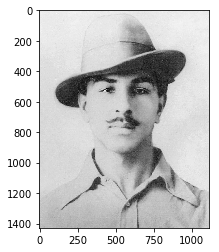

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img2)